<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

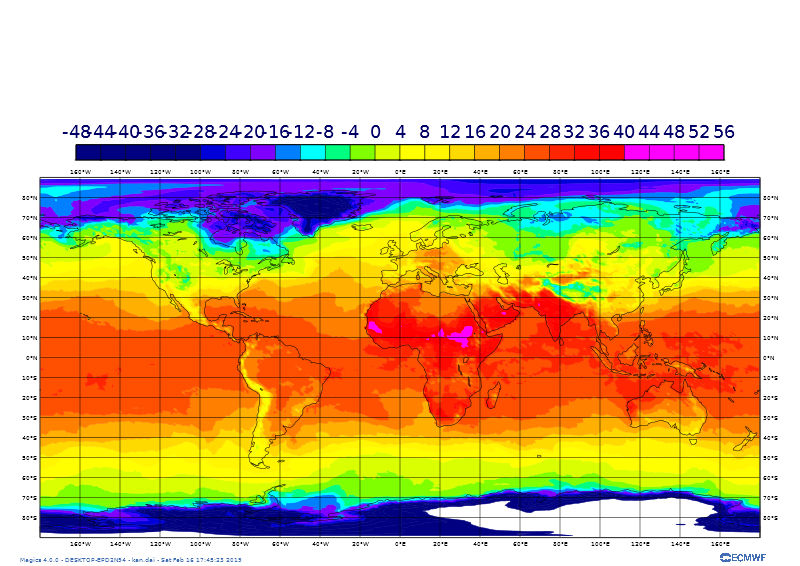

In [1]:
from Magics import macro as magics

data = magics.mgrib(grib_input_file_name= "2t.grib")
contour = magics.mcont(contour_automatic_setting = 'ecmwf', legend='on')
legend = magics.mlegend(legend_display_type = "continuous", 
                        legend_text_font_size=0.75,
                        legend_text_colour ='navy')
magics.plot(data, contour, legend, magics.mcoast())

In [2]:

import ipywidgets as widgets
from ipywidgets import interact

@interact(projection=['robinson', 'mollweide', 'polar_north', 'cylindrical'])
def reproject(projection='robinson'):
    view = magics.mmap(subpage_map_projection = projection)
    coastlines = magics.mcoast(map_label = 'off')
    return magics.plot(view, data, contour, legend, coastlines)




interactive(children=(Dropdown(description='projection', options=('robinson', 'mollweide', 'polar_north', 'cyl…

In [4]:
import xarray as xr
ds = xr.open_dataset('2t.grib', engine='cfgrib')

In [5]:
ds

<xarray.Dataset>
Dimensions:     (values: 6599680)
Coordinates:
    number      int32 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     int32 ...
    latitude    (values) float64 ...
    longitude   (values) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    t2m         (values) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-02-16T17:47:42 GRIB to CDM+CF via cfgrib-0....